# 12面体

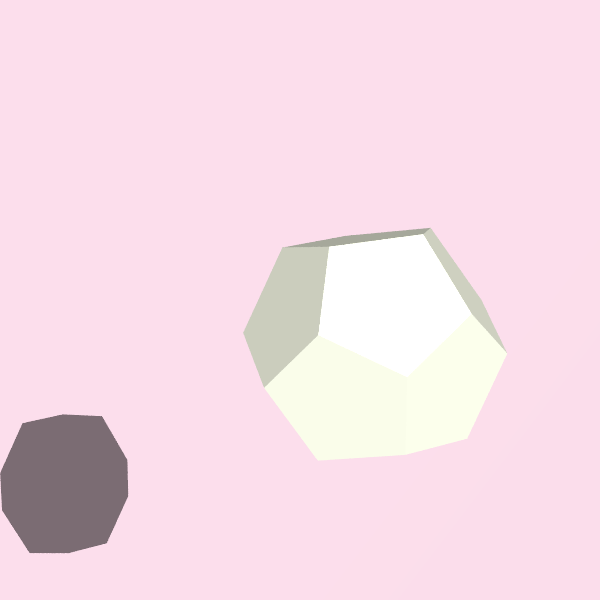

In [70]:
from vapory import *
from math import cos,sin,pi
# Mathからコサイン、サイン、円周率を呼び出す

camera = Camera( 'ultra_wide_angle', 'angle', 10, #カメラの位置、アングルの設定
                 'location', [25 , 25 , 25],
                 'look_at',  [0.0 , 0.0 , 0.0])

sun = LightSource([1500,2500,2500], 'color',1) #光源の設定

sky = Sphere([0,0,0], #空の設定
             1,
             'hollow',
             Texture(Pigment('gradient',
                             [0,1,0],
                             ColorMap([0,'color','White'],[1, 'color', 'Blue' ]),
                             'quick_color',
                             'White'
                            ),
                     Finish('ambient',
                            1,
                            'diffuse', 
                            0
                           )
                    ),
              'scale',
              10000
             )

ground =    Plane(  [0,0,-20], 20 , #地面の設定
            Texture( Pigment( 'color', [1.1*e for e in [1.80,1.35,1.55]])),
            Finish(  'phong', 0.1 )) #Phongシェーディング

x = (pow(5,1.0/2.0)+1)/2 #ルート5

mesh = Mesh2(
    VertexVectors( #正12面体の20の頂点座標 #xyzの座標指定
        20, 
        [1,0,0],                                                 #a=0
        [cos(72*((2*pi)/360)),sin(72*((2*pi)/360)),0],           #b=1
        [-cos(36*((2*pi)/360)),sin(36*((2*pi)/360)),0],          #c=2
        [-cos(36*((2*pi)/360)),-sin(36*((2*pi)/360)),0],         #d=3
        [cos(72*((2*pi)/360)),-sin(72*((2*pi)/360)),0],          #e=4
        [x,0,1],                                                 #f=5
        [x*(cos(72*((2*pi)/360))),x*(sin(72*((2*pi)/360))),1],   #h=6
        [-x*(cos(36*((2*pi)/360))),x*(sin(36*((2*pi)/360))),1],  #j=7
        [x*(-cos(36*((2*pi)/360))),x*(-sin(36*((2*pi)/360))),1], #l=8
        [x*(cos(72*((2*pi)/360))),-x*(sin(72*((2*pi)/360))),1],  #n=9
        [x*(cos(36*((2*pi)/360))),x*(sin(36*((2*pi)/360))),x],   #g=10
        [-x*(cos(72*((2*pi)/360))),x*(sin(72*((2*pi)/360))),x],  #i=11
        [-x,0,x],                                                #k=12
        [-x*(cos(72*((2*pi)/360))),-x*(sin(72*((2*pi)/360))),x], #m=13
        [x*(cos(36*((2*pi)/360))),-x*(sin(36*((2*pi)/360))),x],  #o=14
        [-1,0,x+1],                                              #p=15
        [-cos(72*((2*pi)/360)),-sin(72*((2*pi)/360)),x+1],       #q=16
        [cos(36*((2*pi)/360)),-sin(36*((2*pi)/360)),x+1],        #r=17
        [cos(36*((2*pi)/360)),sin(36*((2*pi)/360)),x+1],         #s=18
        [-cos(72*((2*pi)/360)),sin(72*((2*pi)/360)),x+1]         #t=19
    ),
    FaceIndices( #VertexVectorsの配列から数字(順番)を指定して呼び出す
        36,
        [19,18,17],
        [17,16,15],
        [15,19,17],
        [16,17,14],
        [14,9,13],
        [13,16,14],
        [16,13,8],
        [8,12,15],
        [15,16,8],
        [15,12,7],
        [7,11,19],
        [19,15,7],
        [19,11,6],
        [6,10,18],
        [18,19,6],
        [18,10,5],
        [5,14,17],
        [17,18,5],
        [2,1,0],
        [0,4,3],
        [3,2,0],
        [1,6,10],
        [10,5,0],
        [0,1,10],
        [0,5,14],
        [14,9,4],
        [4,0,14],
        [4,9,13],
        [13,8,3],
        [3,4,13],
        [3,8,12],
        [12,7,2],
        [2,3,12],   
        [2,7,11],
        [11,6,1],
        [1,2,11]
    ),
    Pigment('color', [1.1*e for e in [1.80,1.85,1.55]])
)

scene = Scene(camera, [sun,sky,ground,mesh],
               included=['colors.inc', 'textures.inc'])

scene.render('ipython', width=600, height=600, antialiasing=0.001)